# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Structure-Learn" data-toc-modified-id="Structure-Learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Structure Learn</a></div><div class="lev2 toc-item"><a href="#Learning--Algorithms-Introduction" data-toc-modified-id="Learning--Algorithms-Introduction-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Learning  Algorithms Introduction</a></div><div class="lev2 toc-item"><a href="#Example:-Wet-Grass" data-toc-modified-id="Example:-Wet-Grass-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example: Wet Grass</a></div><div class="lev3 toc-item"><a href="#MB-based-learning" data-toc-modified-id="MB-based-learning-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>MB based learning</a></div><div class="lev3 toc-item"><a href="#Score-based-learning" data-toc-modified-id="Score-based-learning-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Score based learning</a></div><div class="lev2 toc-item"><a href="#Example:-Asia" data-toc-modified-id="Example:-Asia-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example: Asia</a></div><div class="lev3 toc-item"><a href="#MB-based-learning" data-toc-modified-id="MB-based-learning-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>MB based learning</a></div><div class="lev3 toc-item"><a href="#Score-based-learning" data-toc-modified-id="Score-based-learning-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Score based learning</a></div><div class="lev2 toc-item"><a href="#Example:-Marks" data-toc-modified-id="Example:-Marks-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Example: Marks</a></div><div class="lev3 toc-item"><a href="#MB-based-learning" data-toc-modified-id="MB-based-learning-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>MB based learning</a></div><div class="lev3 toc-item"><a href="#Score-based-learning" data-toc-modified-id="Score-based-learning-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Score based learning</a></div><div class="lev3 toc-item"><a href="#Score-based-learning-with-discretized-data-set" data-toc-modified-id="Score-based-learning-with-discretized-data-set-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Score based learning with discretized data set</a></div>

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from graphviz import Digraph, Source

from learning.NaiveBayesLner import *
from learning.MB_GrowShrinkLner import *
from learning.MB_IAMB_Lner import *
from learning.HillClimbingLner import *

import rpy2
%load_ext rpy2.ipython
%R library("bnlearn");
%R library("Rgraphviz");

# Structure Learn

## Learning  Algorithms Introduction

> Learning a Bayesian Network is usually done in two steps: 
> 1. learning the structure (i.e. the graph or skeleton) 
> 2. learning the parameters (i.e., the pots).

To-Do.... Give a brief introduction for all the learning algorithms ....

Beside Naive Bayes method, we use several algorithms as examples:
1. Grow-Shrink (gs): based on the Grow-Shrink Markov Blanket, the first (and simplest) Markov blanket detection algorithm (Margaritis, 2003) used in a structure learning algorithm.

2. Incremental Association: Incremental Association Markov Blanket Learner (IMAB); a subclass of MB_BasedLner. 

3. Hill-Climbing: hill climbing greedy search(HC); a score-based learning algorithms.

The documentations of learning algorithms can be found by using the following commend: 

In [2]:
# ? MB_BasedLner

## Example: Wet Grass

In [3]:
path_csv = '../learning/training_data_c/wetgrass.csv'
%Rpush path_csv
test_csv = 'test.csv'
test_dot = 'test.dot'
states_df = pd.read_csv(path_csv, dtype = str)
for item in states_df.columns.values:
    print(item)

Cloudy
Sprinkler
Rain
WetGrass


### MB based learning
#### QuantumFog

set  $\alpha \approx 5/n$ as threshold used for deciding whether a conditional or unconditional mutual info is said to be close to zero (independence) or not (dependence).

In [4]:
alpha = 5 / len(states_df.index)
print('The time by GrowShrinkLner:')
%time lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
print('\t')
print('The time by IAMB_Lner:')
%time lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)

The time by GrowShrinkLner:
Wall time: 651 ms
	
The time by IAMB_Lner:
Wall time: 592 ms


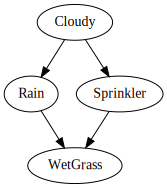

In [5]:
lnr_gs.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

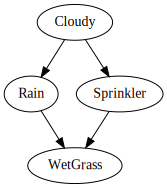

In [6]:
lnr_iamb.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

#### bnlearn

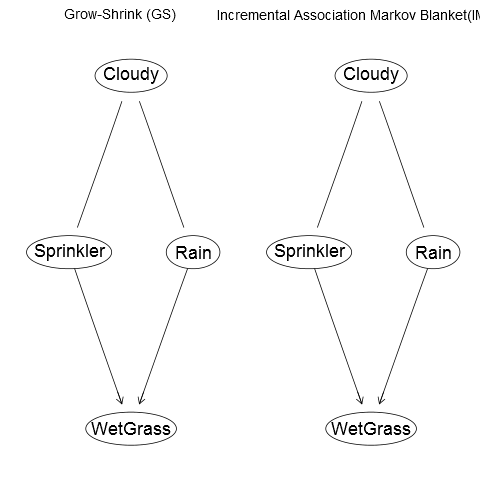

In [7]:
%%R
states_df <- read.csv(file=path_csv, header=TRUE, sep=",", colClasses = "factor")
bn.gs <- gs(states_df);
bn.iamb <- iamb(states_df);
par(mfrow = c(1,2))
graphviz.plot(bn.gs, shape = "ellipse", main = "Grow-Shrink (GS)")
graphviz.plot(bn.iamb, shape = "ellipse", main = "Incremental Association Markov Blanket(IMAB")

#### Compare run time

In [8]:
# firstly passing the value of alpha into R:
%Rpush alpha
print('GrowShrinkLner:')
print('QuantumFog:')
%time lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.gs <- gs(states_df, alpha = alpha);

print('\t')
print('IAMB_Lner:')
print('QuantumFog:')
%time lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.iamb <- iamb(states_df,alpha = alpha);

GrowShrinkLner:
QuantumFog:
Wall time: 569 ms
bnlearn:
Wall time: 11 ms
	
IAMB_Lner:
QuantumFog:
Wall time: 608 ms
bnlearn:
Wall time: 15 ms



It seems that QuantumFog takes much more time than bnlearn, with the same algorithm and same data, even under python kernel.

It might because QuantumFog is more complicated in order to deal with quantum/classical version. Maybe also means some space to improve...

### Score based learning

#### QuantumFog

> score type, either 'LL', 'BIC, 'AIC', 'BDEU' or 'K2'

score_type: BIC


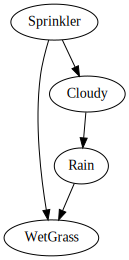

In [9]:
score_type = 'BIC'
max_num_mtries = 40
ess = 1.0 
lnr_hc = HillClimbingLner(states_df, score_type, max_num_mtries, ess)
lnr_hc.bnet.write_dot(test_dot) # write BNet to .dot file
print('score_type:', score_type)
Source(open(test_dot).read())

#### bnlearn

The default score is the **BIC** (Bayesian Information Criterion) for both discrete and continuous data sets

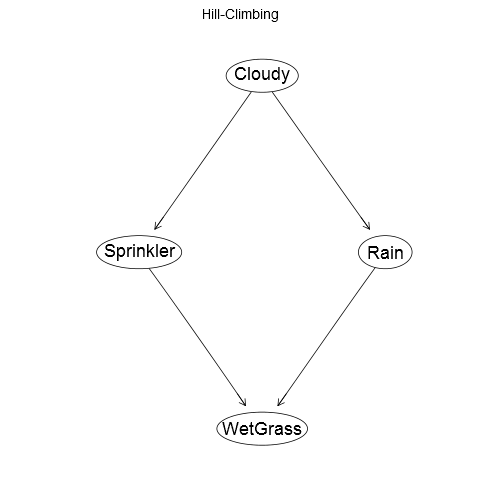

In [10]:
%%R
bn.hc <- hc(states_df);
graphviz.plot(bn.hc, shape = "ellipse", main = "Hill-Climbing")

#### Compare run time

In [11]:
print('HillClimbing:')
print('QuantumFog:')
%time lnr_hc = HillClimbingLner(states_df, score_type, max_num_mtries)
print('bnlearn:')
%time %R bn.hc <- hc(states_df);

HillClimbing:
QuantumFog:
Wall time: 327 ms
bnlearn:
Wall time: 8 ms



QuantumFog still takes much more time than bnlearn.


## Example: Asia

Let's try a larger networks Asia (synthetic) data set by Lauritzen and Spiegelhalter
> Small synthetic data set from Lauritzen and Spiegelhalter (1988) about lung diseases (tuberculosis, lung cancer or bronchitis) and visits to Asia.


The data set is included in bnlearn R package. As introduced in *bnlearn*, the asia data set contains the following variables:

D (dyspnoea), a two-level factor with levels yes and no.

T (tuberculosis), a two-level factor with levels yes and no.

L (lung cancer), a two-level factor with levels yes and no.

B (bronchitis), a two-level factor with levels yes and no.

A (visit to Asia), a two-level factor with levels yes and no.

S (smoking), a two-level factor with levels yes and no.

X (chest X-ray), a two-level factor with levels yes and no.

E (tuberculosis versus lung cancer/bronchitis), a two-level factor with levels yes and no.

In [12]:
path_bif = '../examples_cbnets/asia.bif'
path_dot = '../examples_cbnets/asia.dot'
test_csv = 'test.csv'
test_dot = 'test.dot'

states_df = %R asia
%R states_df = asia
for item in states_df.columns.values:
    print(item)

out = %R capture.output(str(states_df))
print('\n', out)

A
S
T
L
B
E
X
D

 ["'data.frame':\t5000 obs. of  8 variables:"
 ' $ A: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...'
 ' $ S: Factor w/ 2 levels "no","yes": 2 2 1 1 1 2 1 2 2 2 ...'
 ' $ T: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...'
 ' $ L: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...'
 ' $ B: Factor w/ 2 levels "no","yes": 2 1 1 2 1 1 1 2 2 2 ...'
 ' $ E: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...'
 ' $ X: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...'
 ' $ D: Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 1 2 2 2 ...']


view the Asia DAG:
* In the 'path_dot' file, 'A' (visit to Asia) is replaced by 'Travel-Risk'

================ 'Asia' network ================ 


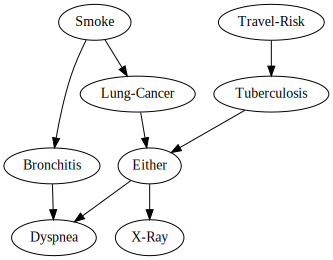

In [13]:
print("================ 'Asia' network ================ ")
Source(open(path_dot).read())

### MB based learning
#### QuantumFog

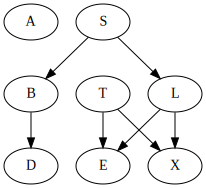

In [14]:
alpha = 8 / len(states_df.index)
lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
lnr_gs.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

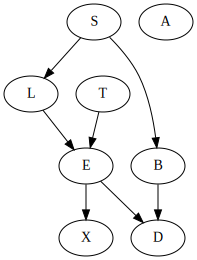

In [15]:
lnr_iamb.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

Unfortunately, none method above learn the structure correctly;

Also, the results are sensitive to "alpha"

#### bnlearn

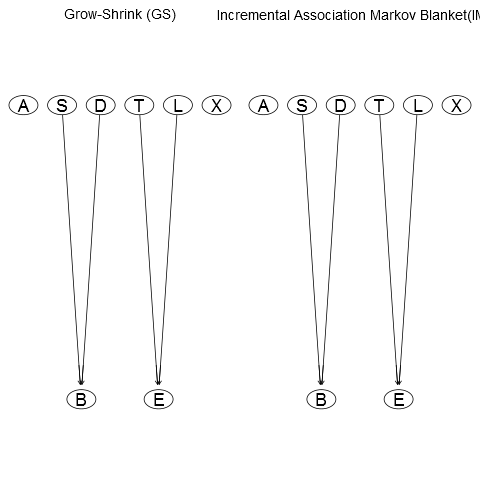

In [16]:
%%R
bn.gs <- gs(states_df);
bn.iamb <- iamb(states_df);
par(mfrow = c(1,2))
graphviz.plot(bn.gs, shape = "ellipse", main = "Grow-Shrink (GS)")
graphviz.plot(bn.iamb, shape = "ellipse", main = "Incremental Association Markov Blanket(IMAB")

#### Compare run time

In [17]:
print('GrowShrinkLner:')
print('QuantumFog:')
%time lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.gs <- gs(states_df, alpha = alpha);

print('\t')
print('IAMB_Lner:')
print('QuantumFog:')
%time lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.iamb <- iamb(states_df,alpha = alpha);

GrowShrinkLner:
QuantumFog:
Wall time: 2.88 s
bnlearn:
Wall time: 24 ms
	
IAMB_Lner:
QuantumFog:
Wall time: 2.55 s
bnlearn:
Wall time: 18 ms


### Score based learning

#### QuantumFog

The Hill_Climbing method in QuantumFog takes time as:
Wall time: 12.5 s

 score_type: BIC


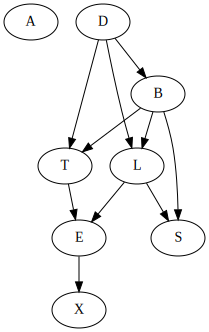

In [18]:
score_type = 'BIC'
max_num_mtries = 30
ess = 1.0 
print("The Hill_Climbing method in QuantumFog takes time as:")
%time lnr_hc = HillClimbingLner(states_df, score_type, max_num_mtries, ess)
lnr_hc.bnet.write_dot(test_dot) # write BNet to .dot file
print('\n score_type:', score_type)
Source(open(test_dot).read())

#### bnlearn

The default score is the **BIC** (Bayesian Information Criterion) for both discrete and continuous data sets

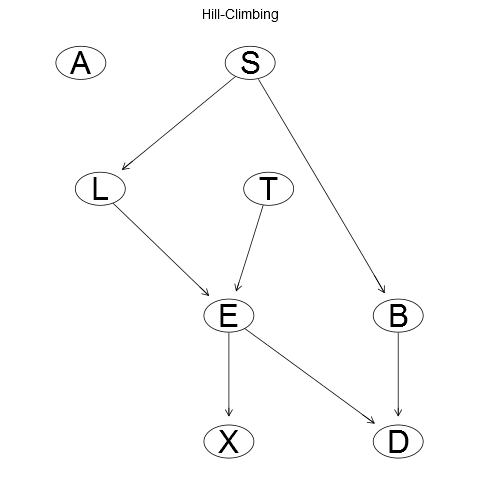

In [19]:
%%R
bn.hc <- hc(states_df);
graphviz.plot(bn.hc, shape = "ellipse", main = "Hill-Climbing")

In [20]:
print("The Hill_Climbing method in bnlearn takes time as:")
%time %R bn.hc <- hc(states_df);

The Hill_Climbing method in bnlearn takes time as:
Wall time: 18 ms


## Example: Marks 

** Examination marks** of 88 students on five different topics, from Mardia (1979).

The marks data set contains the following variables, one for each topic in the examination:

MECH (mechanics)

VECT (vectors)

ALG (algebra)

ANL (analysis)

STAT (statistics)

All are measured on the same scale **(0-100)**.

In [21]:
test_csv = 'test.csv'
test_dot = 'test.dot'

states_df = %R marks
%R states_df = marks
for item in states_df.columns.values:
    print(item)

out = %R capture.output(str(states_df))
print('\n', out)

MECH
VECT
ALG
ANL
STAT

 ["'data.frame':\t88 obs. of  5 variables:"
 ' $ MECH: num  77 63 75 55 63 53 51 59 62 64 ...'
 ' $ VECT: num  82 78 73 72 63 61 67 70 60 72 ...'
 ' $ ALG : num  67 80 71 63 65 72 65 68 58 60 ...'
 ' $ ANL : num  67 70 66 70 70 64 65 62 62 62 ...'
 ' $ STAT: num  81 81 81 68 63 73 68 56 70 45 ...']


We notice that the data set is numerical rather than factor, which is continuous (multivariate normal) data set

### MB based learning
#### QuantumFog

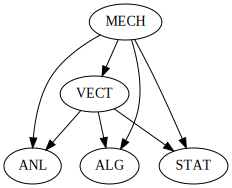

In [22]:
alpha = 5 / len(states_df.index)
lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
lnr_gs.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

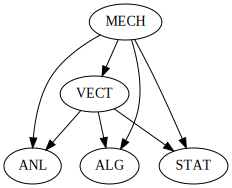

In [23]:
lnr_iamb.bnet.write_dot(test_dot) # write BNet to .dot file
Source(open(test_dot).read())

#### bnlearn

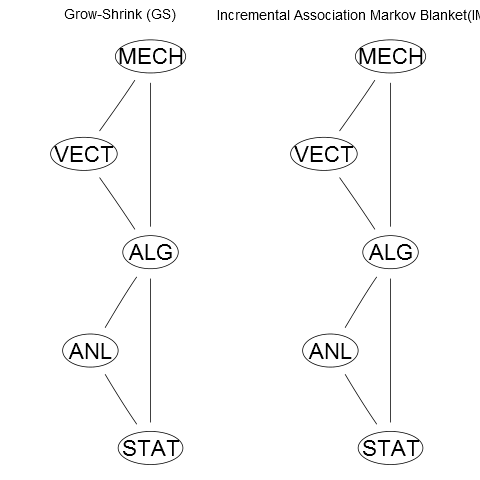

In [24]:
%%R
bn.gs <- gs(states_df);
bn.iamb <- iamb(states_df);
par(mfrow = c(1,2))
graphviz.plot(bn.gs, shape = "ellipse", main = "Grow-Shrink (GS)")
graphviz.plot(bn.iamb, shape = "ellipse", main = "Incremental Association Markov Blanket(IMAB")

So, How to improve the performance of QuantumFog with MB_based methods for continuous data set?

#### Again, compare run time

In [25]:
print('GrowShrinkLner:')
print('QuantumFog:')
%time lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.gs <- gs(states_df, alpha = alpha);

print('\t')
print('IAMB_Lner:')
print('QuantumFog:')
%time lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
print('bnlearn:')
%time %R bn.iamb <- iamb(states_df,alpha = alpha);

GrowShrinkLner:
QuantumFog:
Wall time: 1.05 s
bnlearn:
Wall time: 10 ms
	
IAMB_Lner:
QuantumFog:
Wall time: 1.11 s
bnlearn:
Wall time: 10 ms


### Score based learning

#### QuantumFog

The Hill_Climbing method in QuantumFog takes time as:
Wall time: 184 ms

 score_type: BIC


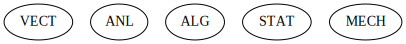

In [26]:
score_type = 'BIC'
max_num_mtries = 30
ess = 1.0 
print("The Hill_Climbing method in QuantumFog takes time as:")
%time lnr_hc = HillClimbingLner(states_df, score_type, max_num_mtries, ess)
lnr_hc.bnet.write_dot(test_dot) # write BNet to .dot file
print('\n score_type:', score_type)
Source(open(test_dot).read())

#### bnlearn

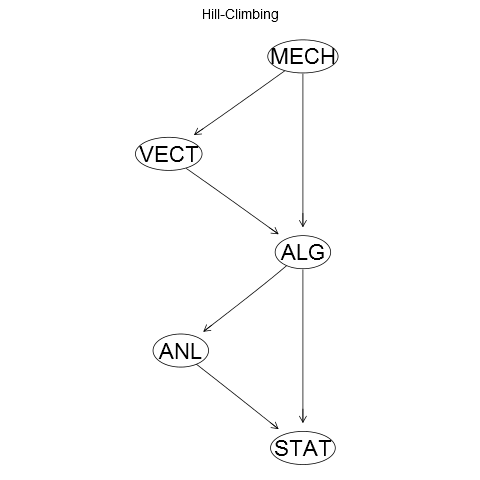

In [27]:
%%R
bn.hc <- hc(states_df);
graphviz.plot(bn.hc, shape = "ellipse", main = "Hill-Climbing")

So, How to improve the performance of QuantumFog with MB_based methods for continuous data set?

### Score based learning with discretized data set

In order to see how discretized data set affect the results, we convert numeric data to factor data. 

We first write the "marks" data to csv file, then read them out as 'factor' type. This also suggest that we should be careful when reading data from .csv files.

In [28]:
%%R
write.csv(marks, file = 'test.csv', quote = FALSE, row.names = FALSE )
states_df <- read.csv(file='test.csv', header=TRUE, sep=",", colClasses = "factor")

Now "states_df" contains discretized data set as factors; "marks" contains continuous data set.

In [29]:
%Rpull states_df
%Rpull marks

out = %R capture.output(str(states_df))
print('data structure for states_df: ')
print(out)

data structure for states_df: 
["'data.frame':\t88 obs. of  5 variables:"
 ' $ MECH: Factor w/ 46 levels "0","10","12",..: 45 40 44 35 40 33 31 37 39 41 ...'
 ' $ VECT: Factor w/ 40 levels "24","26","27",..: 39 38 37 36 31 30 33 35 29 36 ...'
 ' $ ALG : Factor w/ 38 levels "15","21","31",..: 34 38 36 31 33 37 33 35 26 28 ...'
 ' $ ANL : Factor w/ 46 levels "15","17","20",..: 44 45 43 45 45 41 42 39 39 39 ...'
 ' $ STAT: Factor w/ 45 levels "14","15","17",..: 44 44 44 41 38 43 41 35 42 27 ...']


#### QuantumFog


 score_type: BIC


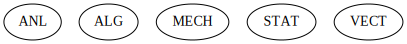

In [30]:
lnr_hc = HillClimbingLner(states_df, score_type, max_num_mtries, ess)
lnr_hc.bnet.write_dot(test_dot) # write BNet to .dot file
print('\n score_type:', score_type)
Source(open(test_dot).read())

The HC method in QFog gives the same results for both continuous data and discretized data.

It seems that we treat all the data sets as discretized? Or I just misused the function?

#### bnlearn

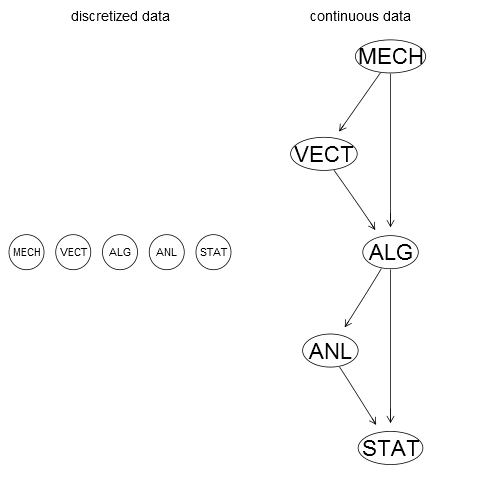

In [31]:
%%R
bn.hc1 <- hc(marks);
bn.hc2 <- hc(states_df);
par(mfrow = c(1,2))
graphviz.plot(bn.hc2, main = "discretized data")
graphviz.plot(bn.hc1, shape = "ellipse", main = "continuous data") 

The bnlearn with discretized data set (which is wrong of course) gives the same result as QFog does. On the other hand, the continuous data gives the correct result. 

In order to check how discretization affect the learned networks, we apply bnlearn.hc method for different discretized data set:

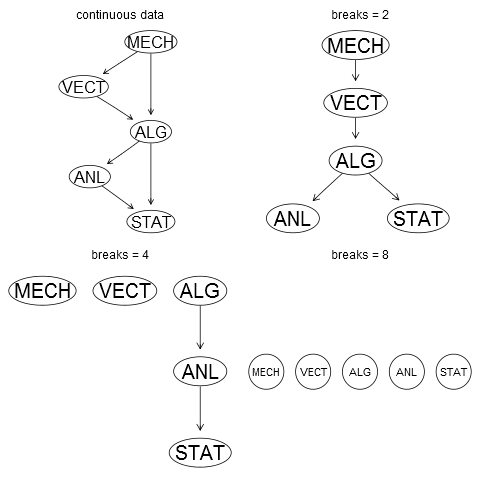

In [32]:
%%R
marks.d2 <- discretize(marks, method = "interval", breaks = 2)
marks.d4 <- discretize(marks, method = "interval", breaks = 4)
marks.d8 <- discretize(marks, method = "interval", breaks = 8)

bn.hc2 <- hc(marks.d2)
bn.hc4 <- hc(marks.d4)
bn.hc8 <- hc(marks.d8)
par(mfrow = c(2,2))
graphviz.plot(bn.hc1, shape = "ellipse", main = "continuous data") 
graphviz.plot(bn.hc2, shape = "ellipse", main = "breaks = 2") 
graphviz.plot(bn.hc4, shape = "ellipse", main = "breaks = 4") 
graphviz.plot(bn.hc8, main = "breaks = 8") 

The results for discretized data can keep parts of the full network. However, these connections disappear with more data breaks.

In [33]:
out = %R capture.output(str(marks.d2))
print(out)
out = %R capture.output(str(marks.d8))
print(out)

["'data.frame':\t88 obs. of  5 variables:"
 ' $ MECH: Factor w/ 2 levels "[-0.077,38.5]",..: 2 2 2 2 2 2 2 2 2 2 ...'
 ' $ VECT: Factor w/ 2 levels "[8.93,45.5]",..: 2 2 2 2 2 2 2 2 2 2 ...'
 ' $ ALG : Factor w/ 2 levels "[14.9,47.5]",..: 2 2 2 2 2 2 2 2 2 2 ...'
 ' $ ANL : Factor w/ 2 levels "[8.94,39.5]",..: 2 2 2 2 2 2 2 2 2 2 ...'
 ' $ STAT: Factor w/ 2 levels "[8.93,45]","(45,81.1]": 2 2 2 2 2 2 2 2 2 1 ...']
["'data.frame':\t88 obs. of  5 variables:"
 ' $ MECH: Factor w/ 8 levels "[-0.077,9.62]",..: 8 7 8 6 7 6 6 7 7 7 ...'
 ' $ VECT: Factor w/ 8 levels "[8.93,18.1]",..: 8 8 8 7 6 6 7 7 6 7 ...'
 ' $ ALG : Factor w/ 8 levels "[14.9,23.1]",..: 7 8 7 6 7 8 7 7 6 6 ...'
 ' $ ANL : Factor w/ 8 levels "[8.94,16.6]",..: 8 8 8 8 8 8 8 7 7 7 ...'
 ' $ STAT: Factor w/ 8 levels "[8.93,18]","(18,27]",..: 8 8 8 7 6 8 7 6 7 4 ...']


#### QuantumFog

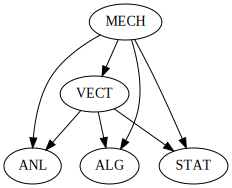

In [34]:
lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
lnr_iamb.bnet.write_dot(test_dot) 
Source(open(test_dot).read())

One can also check MB_based methods in QuanntumFog with discretized data; They give the same results as before.

So, how to treat continuous data in QFog?